In [1]:
# import libraries
import keras
from utils.preprocess import *
from config import *

In [2]:
# load dataset
dataset = load_unipen_dataset(no_cap)

# normalize dataset
def normalize(data, label):
    return tf.cast(data, tf.float32) / 255.0, label

if normalize_dataset:
    dataset = dataset.map(normalize)

dataset = dataset.shuffle(shuffle_buffer_size)

# split & filter dataset
train_size = int(train_prop * dataset.cardinality().numpy())
train_dataset = dataset.take(train_size).batch(batch_size)
test_dataset = dataset.skip(train_size).batch(batch_size)

In [3]:
# build model
model = keras.Sequential([
    keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(64, 64, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    # keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128)
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

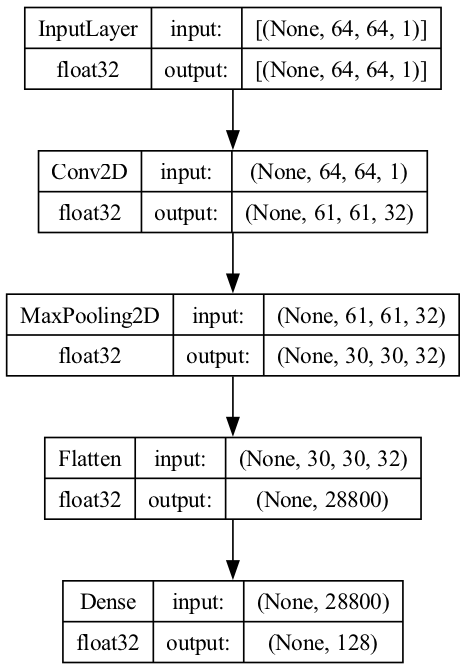

In [4]:
# plot model
target_model = "unipen_no_cap_model" if no_cap else "unipen_model"

keras.utils.plot_model(model, to_file=f"data/{target_model}.png", show_shapes=True, show_layer_names=False, dpi=120, show_dtype=True)

In [5]:
model.fit(train_dataset, epochs=epochs)

Epoch 1/10
1365/1365 [==============================] - 57s 42ms/step - loss: 3.1945 - accuracy: 0.5255
Epoch 2/10
1365/1365 [==============================] - 63s 46ms/step - loss: 0.8544 - accuracy: 0.7662
Epoch 3/10
1365/1365 [==============================] - 54s 39ms/step - loss: 0.5331 - accuracy: 0.8517
Epoch 4/10
1365/1365 [==============================] - 55s 40ms/step - loss: 0.3844 - accuracy: 0.8930
Epoch 5/10
1365/1365 [==============================] - 48s 35ms/step - loss: 0.3067 - accuracy: 0.9140
Epoch 6/10
1365/1365 [==============================] - 45s 33ms/step - loss: 0.2490 - accuracy: 0.9322
Epoch 7/10
1365/1365 [==============================] - 46s 33ms/step - loss: 0.2081 - accuracy: 0.9454
Epoch 8/10
1365/1365 [==============================] - 46s 34ms/step - loss: 0.1734 - accuracy: 0.9549
Epoch 9/10
1365/1365 [==============================] - 46s 34ms/step - loss: 0.1434 - accuracy: 0.9624
Epoch 10/10
1365/1365 [==============================] - 47s 35m

In [6]:
# evaluate model
test_loss, test_acc = model.evaluate(test_dataset)

print()
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

585/585 [==============================] - 6s 9ms/step - loss: 1.8222 - accuracy: 0.7827

Test loss: 1.8221712112426758
Test accuracy: 0.7826876640319824


In [7]:
# save model
model.save(f"data/{target_model}.h5")

/Users/dogeon/Documents/code/py/unipen/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
